In [1]:
from os import walk
import pandas as pd
import os
import autopep8
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import numpy as np

In [2]:
data_files_with_separators = [
    ('./data/smile.csv', ','),
    ('./data/2d-10c.dat', ' '),
    ('./data/square.data', ' '),
    ('./data/long.data', ' '),
    ('./data/order2-3clust.csv', ',')
]

data = dict()
for file_name, separator in data_files_with_separators:
    df = pd.read_csv(file_name, sep=separator, header=None)

    data[file_name] = {
        'number_of_classes': len(df[2].unique()),
        'data': df
    }

In [3]:
def plot_hierarhical_cluster(raw_data, linkage, n_clusters, ax):
    clustering = AgglomerativeClustering(
        linkage=linkage, 
        n_clusters=n_clusters
    ).fit(raw_data['data'][[0, 1]])
    
    clustered_data = raw_data['data'].copy()
    clustered_data[2] = clustering.labels_
    g = sns.scatterplot(
        x=0,
        y=1,
        data=clustered_data, 
        hue=2, 
        ax=ax
    )
    ax.set_title(file_name + " - " + linkage + " linkage")

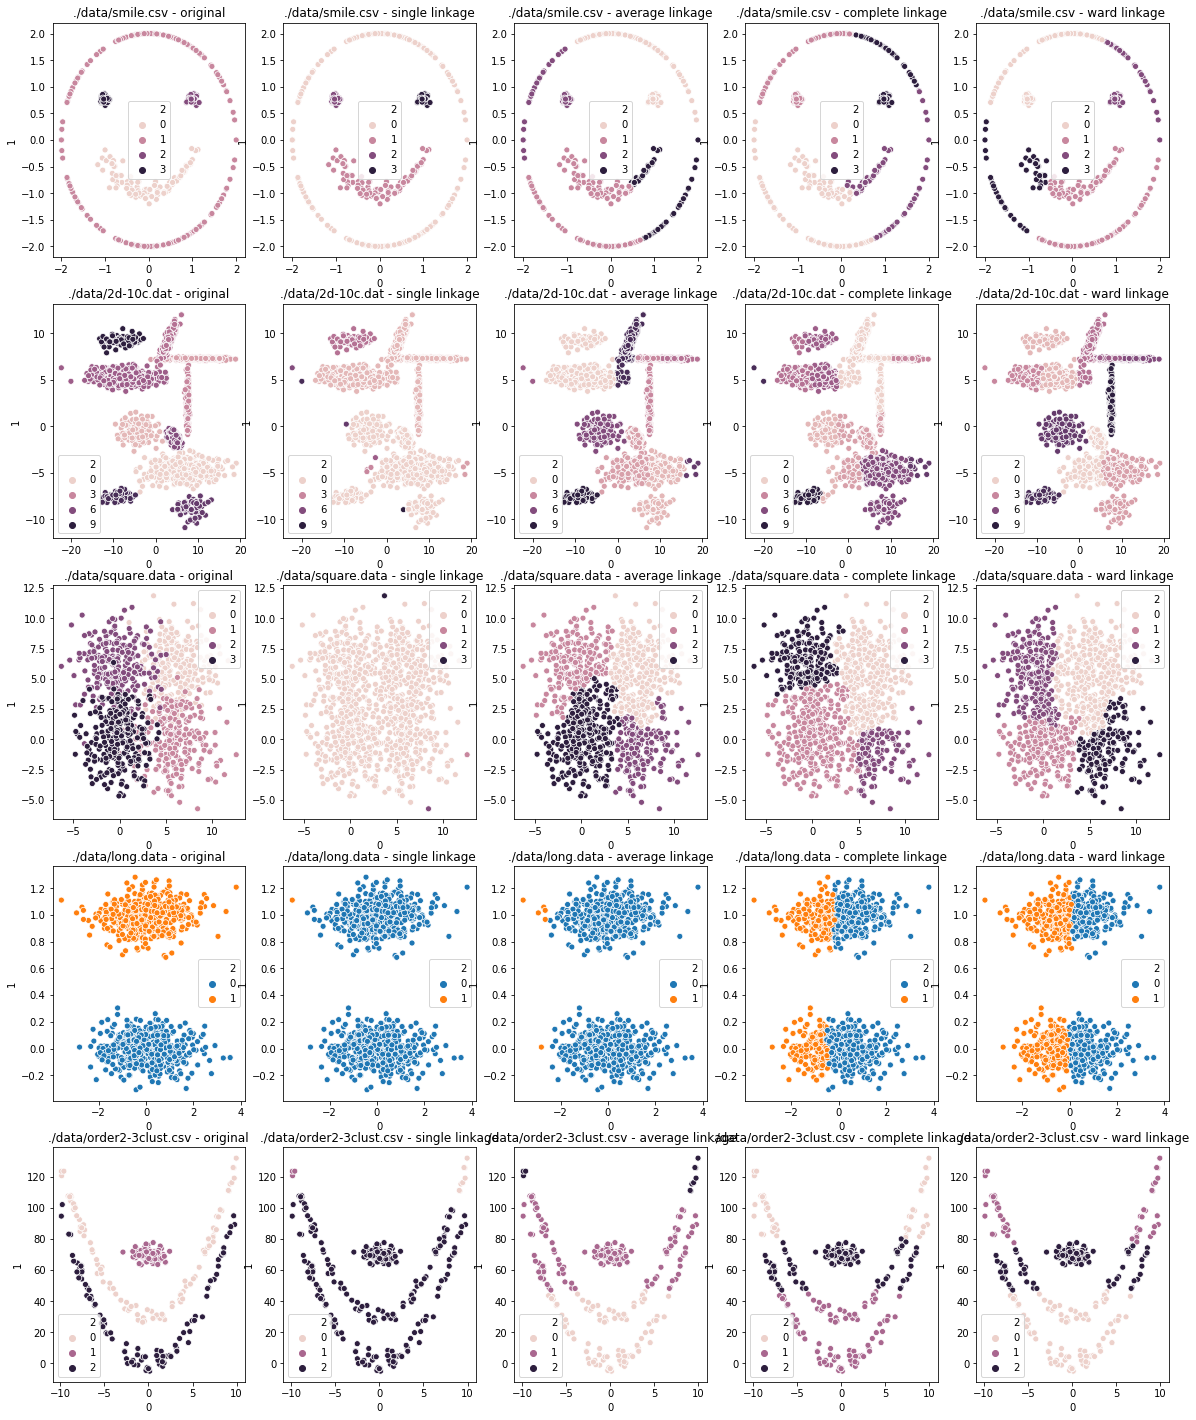

In [4]:
fig, axs = plt.subplots(nrows=len(data_files_with_separators), ncols=5, figsize=(20, 25))

idx = 0
for file_name, raw_data in data.items():
    
    # Original data plot
    g = sns.scatterplot(
        x=0,
        y=1,
        data=raw_data['data'], 
        hue=2, 
        ax=axs[idx][0]
    )
    axs[idx][0].set_title(file_name + " - original")
    
    plot_hierarhical_cluster(raw_data, 'single', raw_data['number_of_classes'], axs[idx][1])
    plot_hierarhical_cluster(raw_data, 'average', raw_data['number_of_classes'], axs[idx][2])
    plot_hierarhical_cluster(raw_data, 'complete', raw_data['number_of_classes'], axs[idx][3])
    plot_hierarhical_cluster(raw_data, 'ward', raw_data['number_of_classes'], axs[idx][4])
    
    idx += 1